In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# output from time command 
# real    1m13.180s
# user    0m20.084s
# sys     0m3.491s

df = pd.read_pickle('../../results/automated_test_1_results.pkl')
df

,solved_puzzle,number_found,groups_found
0,True,4,"[[charm, hex, magic, spell], [cape, mask, tigh..."
1,False,0,[]
2,True,4,"[[pares, peels, shells, shucks], [head, knees,..."
3,False,2,"[[exploit, leverage, milk, use], [done, over, ..."
4,False,2,"[[drain, duct, pipe, sewer], [cheese, corn, sa..."
5,True,4,"[[back, champion, endorse, support], [banner, ..."
6,True,4,"[[griddle, kettle, pan, pot], [frill, fringe, ..."
7,False,1,"[[choice, say, voice, vote]]"
8,False,1,"[[easy, flexible, open, receptive]]"
9,False,1,"[[chow, eats, fare, grub]]"


In [51]:
# computer percent of tests that solved the puzzle
df['solved'] = df['solved_puzzle'].astype(int)



In [52]:
df.describe()

,number_found,solved
count,10.000000,10.000000
mean,2.300000,0.400000
std,1.567021,0.516398
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,4.000000,1.000000
max,4.000000,1.000000


In [53]:
# real    2m34.328s
# user    1m16.371s
# sys     0m5.903s

# set pandas option to print only 10 rows
pd.set_option('display.max_rows', 10)
df = pd.read_pickle('../../results/automated_test_2b_results.pkl')
df

,solved_puzzle,number_found,groups_found
0,True,4,"[[hail, rain, sleet, snow], [option, return, s..."
1,False,0,[]
2,True,4,"[[chow, gobble, scarf, wolf], [cheek, eye, mou..."
3,True,4,"[[adidas, nike, puma, reebok], [dust, mop, swe..."
4,True,4,"[[blue, down, glum, low], [hulu, netflix, peac..."
...,...,...,...
45,False,0,[]
46,True,4,"[[desert, forest, grassland, tundra], [chamele..."
47,True,4,"[[ghost, phantom, specter, spirit], [corduroy,..."
48,False,0,[]


In [54]:
# compute percent of tests that solved the puzzle
df['solved'] = df['solved_puzzle'].astype(int)
df.describe()


,number_found,solved
count,50.000000,50.000000
mean,2.640000,0.560000
std,1.638317,0.501427
min,0.000000,0.000000
25%,1.000000,0.000000
50%,4.000000,1.000000
75%,4.000000,1.000000
max,4.000000,1.000000


In [55]:

np.random.seed(42)
# Assuming df is your DataFrame and df.solved is the column of interest

# Number of bootstrap samples
n_bootstraps = 50000

# Function to compute the mean of the solved column
def bootstrap_mean(data, n_bootstraps):
    means = []
    for _ in range(n_bootstraps):
        sample = data.sample(frac=1, replace=True)
        means.append(sample.mean())
    return np.array(means)

# Compute bootstrap means
bootstrap_means = bootstrap_mean(df['solved'], n_bootstraps)

# Compute the average fraction solved
average_fraction_solved = np.mean(bootstrap_means)

# Compute the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Average fraction solved: {average_fraction_solved}")
print(f"95% confidence interval: {confidence_interval}")




Average fraction solved: 0.5599868
95% confidence interval: [0.42 0.7 ]


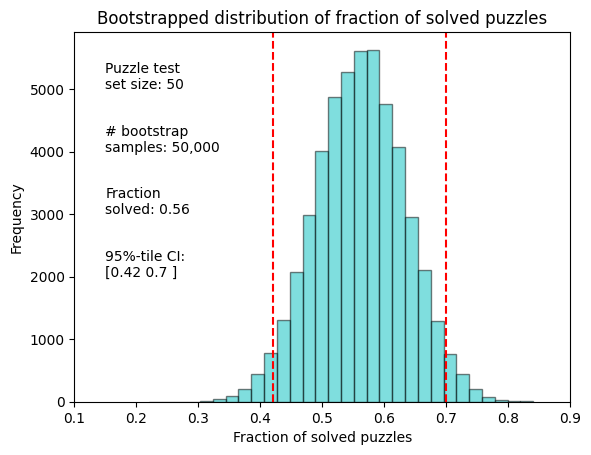

In [56]:

pd.Series(bootstrap_means).hist(bins=30, color='c', alpha=0.5, edgecolor='black', grid=False)
# title to slide
plt.title('Bootstrapped distribution of fraction of solved puzzles')

# add annotation to plot on 95%-confidence interval
plt.axvline(confidence_interval[0], color='r', linestyle='--')
plt.axvline(confidence_interval[1], color='r', linestyle='--')
# add text annotation for the confidence interval
plt.text(0.15, 5000, f'Puzzle test\nset size: {df.shape[0]}', fontsize=10)
plt.text(0.15, 4000, f'# bootstrap\nsamples: {n_bootstraps:,d}', fontsize=10)
plt.text(0.15, 3000, f'Fraction\nsolved: {df.solved.mean():0.2f}', fontsize=10)
plt.text(0.15, 2000, f'95%-tile CI:\n{confidence_interval}', fontsize=10)
plt.xlabel('Fraction of solved puzzles')
plt.ylabel('Frequency')
plt.xlim(0.1,0.9)
# save image to file
plt.savefig('../../images/bootstrap_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [57]:
pd.Series(bootstrap_means).describe(percentiles=[0.025,0.25,0.5,0.75, 0.975])

count    50000.000000
mean         0.559987
std          0.069913
min          0.220000
2.5%         0.420000
25%          0.520000
50%          0.560000
75%          0.600000
97.5%        0.700000
max          0.840000
dtype: float64